In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# Exploratory Data Analysis (EDA)

In [2]:
glass = pd.read_excel("/Users/utkarshhajare/DS material/Assignements/Random Forest/glass.xlsx", sheet_name=1)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
print("Dataset Shape:", glass.shape)

Dataset Shape: (214, 10)


In [6]:
print("\nData Types:\n", glass.dtypes)


Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [7]:
print("\nFirst 5 Rows:\n", glass.head())


First 5 Rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [8]:
print("\nSummary Statistics:\n", glass.describe())


Summary Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.0

In [9]:
print("\nMissing Values:\n", glass.isnull().sum())


Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


Check for invalid values (e.g., negative values)

In [11]:
print("\nNegative Values:\n", (glass < 0).sum())


Negative Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


# Data Visualization

Histograms for numerical features

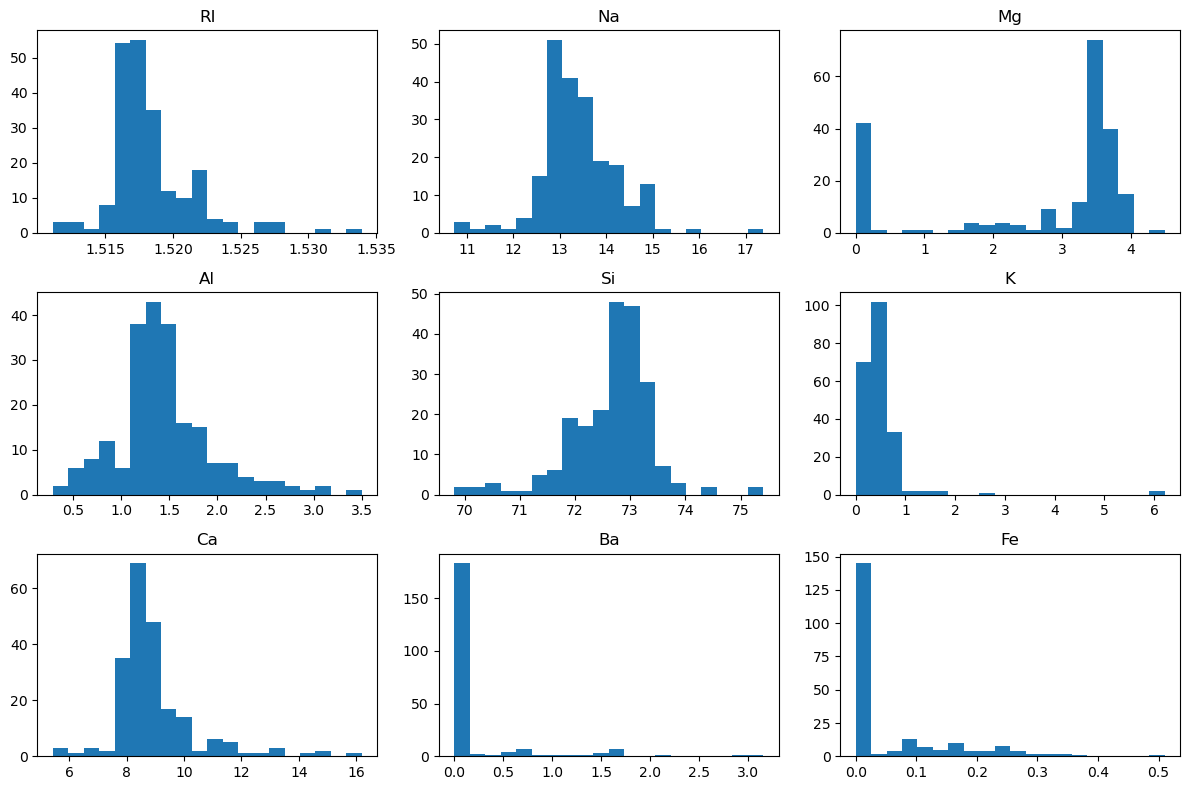

In [13]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(glass[col], bins=20)
    plt.title(col)
plt.tight_layout()

Box plots for outliers

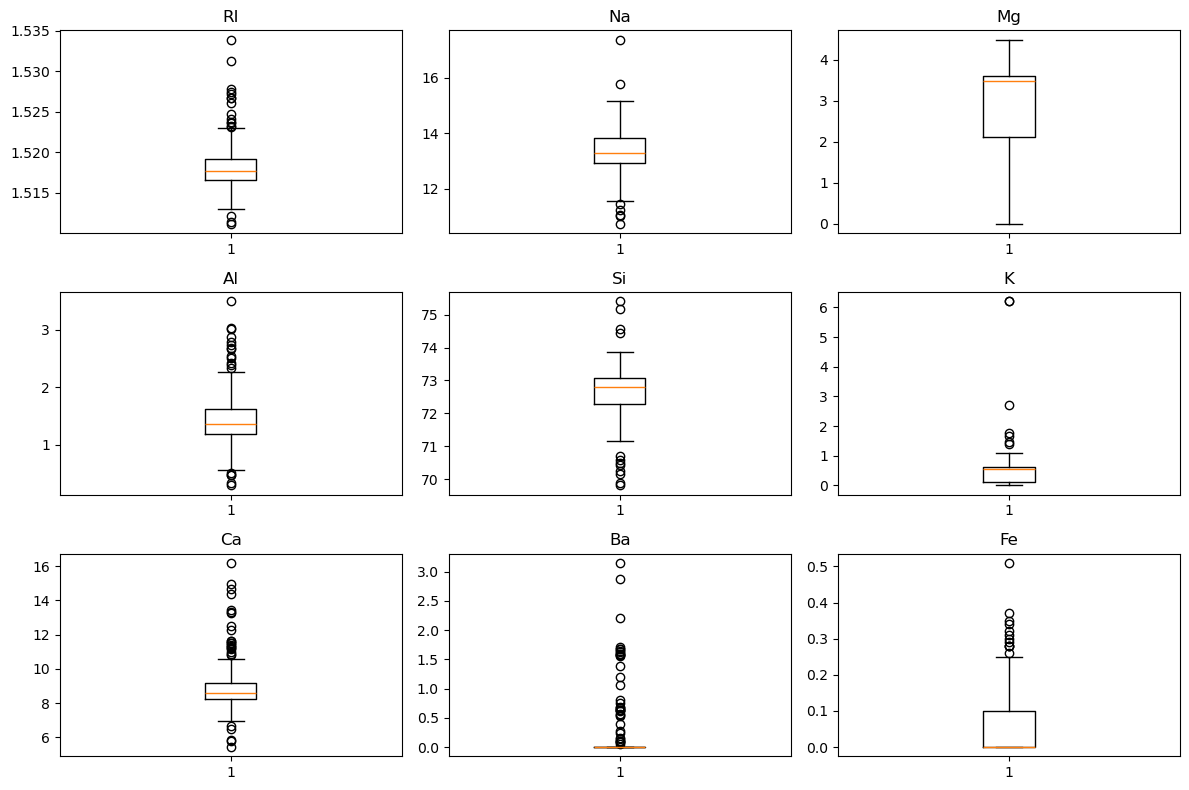

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(glass[col])
    plt.title(col)
plt.tight_layout()

Bar plot for Type distribution

Text(0, 0.5, 'Count')

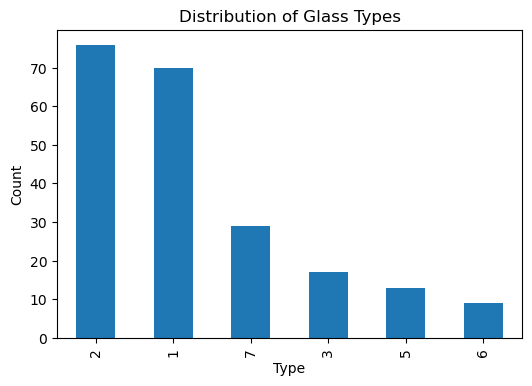

In [16]:
plt.figure(figsize=(6, 4))
glass['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Glass Types')
plt.xlabel('Type')
plt.ylabel('Count')

Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

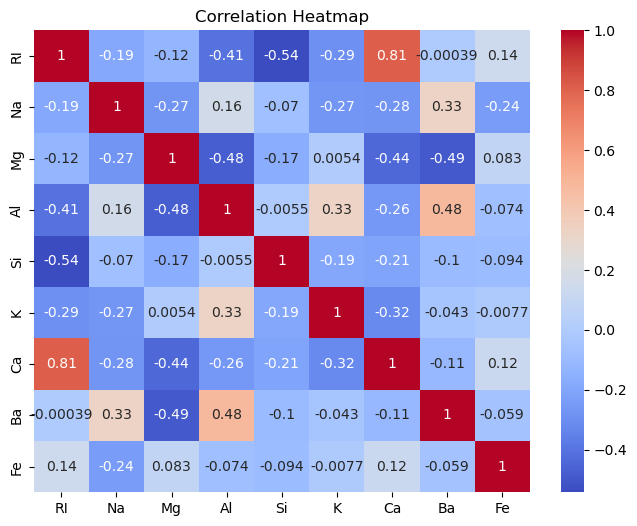

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(glass[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Data Preprocessing

Features and target

In [19]:
X = glass.drop('Type', axis=1)
y = glass['Type']

Handle missing values (impute with median if any)

In [20]:
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

Feature scaling

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nTrain Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (171, 9)
Test Shape: (43, 9)


# Random Forest Model Implementation

Train Random Forest

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Evaluate Random Forest

In [25]:
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.85      0.79      0.81        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.92      0.83      0.85        43
weighted avg       0.87      0.86      0.85        43


Random Forest Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 2 11  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


# Bagging and Boosting Methods

Bagging with Decision Tree

In [26]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("\nBagging Performance:\n")
print(classification_report(y_test, y_pred_bagging))
print("\nBagging Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))


Bagging Performance:

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.84        43
weighted avg       0.87      0.86      0.85        43


Bagging Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 3 10  1  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


Boosting with AdaBoost

In [27]:
boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("\nBoosting Performance:\n")
print(classification_report(y_test, y_pred_boosting))
print("\nBoosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_boosting))


Boosting Performance:

              precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43


Boosting Confusion Matrix:
 [[10  1  0  0  0  0]
 [ 7  6  0  0  1  0]
 [ 3  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 0  6  0  0  0  2]]


/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data_science_env/lib/pyt

# Additional Notes

**1. Explain Bagging and Boosting methods. How is it different from each other.**

- Bagging vs. Boosting:
  - Bagging: Trains multiple models (e.g., Decision Trees) on random subsets of data (with replacement) and averages predictions. Reduces variance, prevents overfitting. Example: Random Forest.
  - Boosting: Trains models sequentially, with each model focusing on errors of the previous one (weighted data). Reduces bias, improves accuracy. Example: AdaBoost.
  - Difference: Bagging is parallel and variance-focused; boosting is sequential and bias-focused. Bagging is robust to noise; boosting can overfit noisy data.

**2. Explain how to handle imbalance in the data.**

- Use class_weight='balanced' in Random Forest to assign higher weights to minority classes.
- Alternative (not used for simplicity): Oversampling (SMOTE) or undersampling.